# Parsing notebooks into pretty HTML

This is an example notebook showing one way to document data science / analytics work directly from Jupyter notebooks.  

The main idea is that the work of generating a presentation document (fit for consumption by a non-technical audience) should (as much as possible) not be separate from the process of generating the work itself.

Here are the libraries necesary to accomplish this in a simple way:

In [ ]:
import re, os
import pygments
from pygments import lexers, formatters
from jinja2 import Template
import json
import markdown

Often it's enough to parse a cell for simple markup tags that can be easily inserted into the context of some code.  For example, to have the ability to hide and reveal code _within a cell_ the following code is sufficient:

In [102]:
def hidden(lines, agg = []):
    if '#hide' in lines:
        if '#show' not in lines:
            b = lines.index('#hide')
            return lines[:b] + agg
        elif lines.index('#show'):
            a = lines.index('#hide')+1
            b = lines.index('#show')
            return hidden(lines[b+1:], lines[a:b])
    return agg + lines

#hide
def this_function_wont_appear():
    pass

Obviously we want to be able to include graphs:

In [111]:
#hide
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

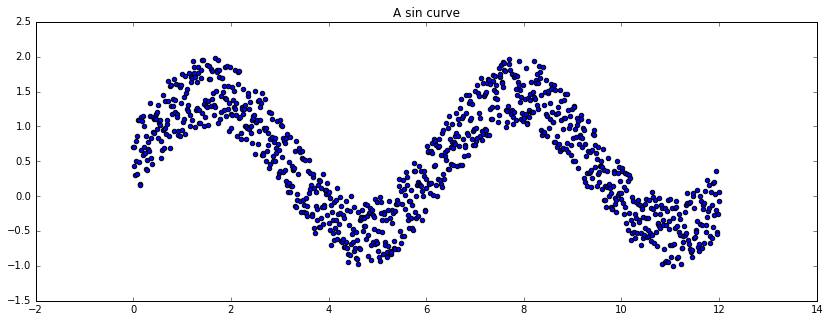

In [115]:
x = np.linspace(0, 12, 1000)
y = np.sin(x) + np.random.rand(1000)
#hide
plt.figure(figsize=(14,5))
plt.scatter(x=x, y=y)
plt.title("A sin curve")
plt.show()

In [116]:
print """
And finally its important to be able to include output, whether text or a dataframe.
"""

pd.DataFrame({'x': x, 'y': y}).head()


And finally its important to be able to include output, whether text or a dataframe.



,x,y
0,0.000000,0.709509
1,0.012012,0.435655
2,0.024024,0.701350
3,0.036036,0.303451
4,0.048048,0.783879
